In [1]:
# POPULATION ANALYSIS - TRAINED DATA, no familiarity effect. regulation carries on

# import list
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import main_funcs as mfun
import utils_funcs as utils
import plot_funcs as pfun
import matplotlib.pyplot as plt
import pickle
from scipy import stats
from itertools import compress
import seaborn as sns
from sklearn import preprocessing
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import glob as glob
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category= FutureWarning) 

#paths
savefigpath  = r'G:\My Drive\Manuscripts\1 CLAStPFC\panels_raw'
'G:\\My Drive\\Manuscripts\\3 CLAStPFC\\figuresForCLAStPFC\\figurePanels\\'
analysispath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\'

Env: clapfcstimulation


[22101, 22102, 22103, 22105, 22107, 2303, 2304]
Sensory - Total animal number for 7
All cell number:872
Any responsive cell number:543
Responsice to  visual and opto but not both cell number:32
Visual cue - all visual responsive cells: 195
Visual cue - only visual responsive: 53
Visual only cue - EXC opto responsive: 0.4717948717948718
Visual only cue - INH opto responsive: 0.5282051282051282
Opto stimulation - all opto responsive cells: 327
Opto stimulation - only opto responsive: 117
Opto stimulation - EXC opto responsive: 0.25688073394495414
Opto stimulation - INH opto responsive: 0.7431192660550459
Both - all both responsive cells:341
Both - only both responsive: 123
Both - EXC opto responsive: 0.3983739837398374
Both - INH opto responsive: 0.6016260162601627
All cell number:2518
Any responsive cell number:1668
Responsice to  visual and opto but not both cell number:191
Visual cue - all visual responsive cells: 712
Visual cue - only visual responsive: 212
Visual only cue - EXC opto

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


All cell number:1468
Any responsive cell number:912
Responsice to  visual and opto but not both cell number:70
Visual cue - all visual responsive cells: 440
Visual cue - only visual responsive: 97
Visual only cue - EXC opto responsive: 0.5613636363636364
Visual only cue - INH opto responsive: 0.43863636363636366
Opto stimulation - all opto responsive cells: 555
Opto stimulation - only opto responsive: 185
Opto stimulation - EXC opto responsive: 0.45765765765765765
Opto stimulation - INH opto responsive: 0.5423423423423424
Both - all both responsive cells:560
Both - only both responsive: 172
Both - EXC opto responsive: 0.4418604651162791
Both - INH opto responsive: 0.5581395348837209
[0.03125, 0.296875, 0.109375]
[0.03125, 0.015625, 0.6875]
[0.21875, 0.578125, 0.375]


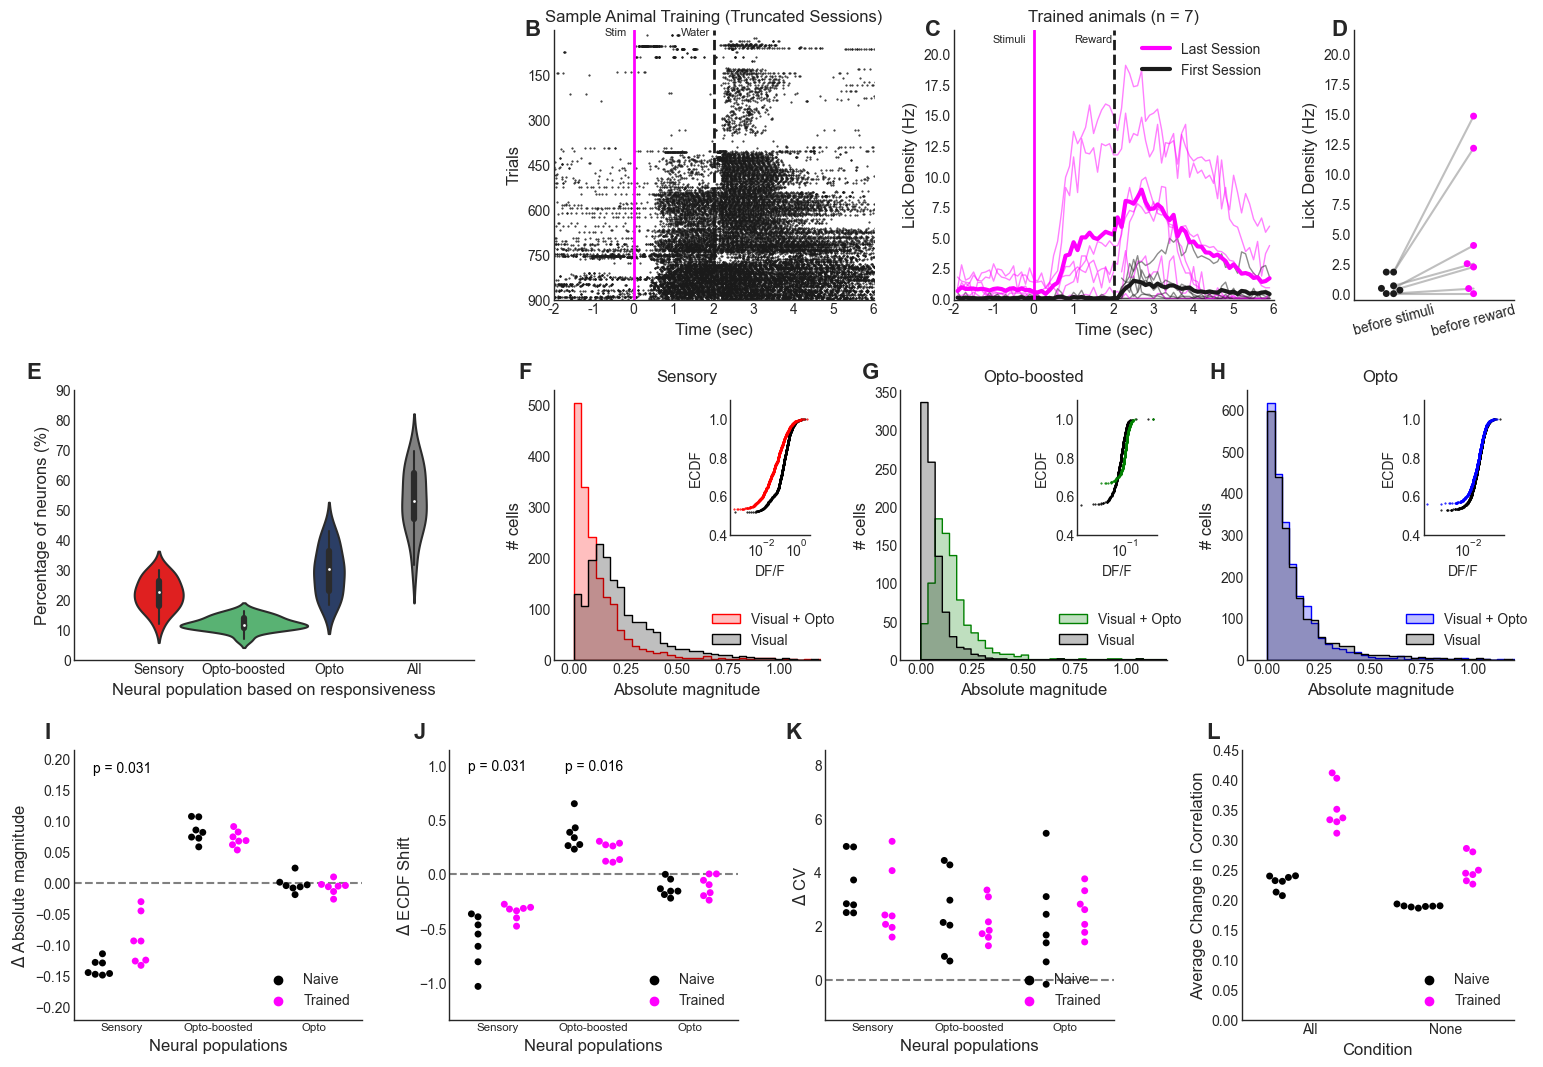

In [2]:
# Figure 3 : Chrimson mice - TRAINED population analysis
interestedCohort = 'Chrimson'
interestedTrainedLevel = 'Trained'

plotParams = {
    'ylimitsforhist': [0, 750],
    'xlimitsforhist': [-0.75, 0.75],
    'analysis_time': 1500,  # in ms
    'colorbarlimitsForHeatMap': [-1, 1],
    'scatterplotlimits': [-4.5, 4.5],
    'ylimitsforECDF': [0.6, 1.1],
    'xlimitsforABS': [-0.1, 1.2],
    'xlimitsforCV': [-3, 3],
    'faceColors': ['black','red'],
            }

pfun.set_figure()
fig = plt.figure(constrained_layout=False, figsize=(16, 18)) # 8,11 for full A4 page

# set gridspecs
gs_exampleTrainingSession  = fig.add_gridspec(ncols=1, nrows=1, bottom=0.80, top=0.95, left=0.35,right=0.55,
                              wspace=0.1, hspace=0.2)
gs_lickAllTrace            = fig.add_gridspec(ncols=1, nrows=1, bottom=0.80, top=0.95, left=0.60, right=0.80,
                              wspace=0.2, hspace=0.4)
gs_lickAllTraceSumary      = fig.add_gridspec(ncols=1, nrows=1, bottom=0.80, top=0.95, left=0.85, right=0.95,
                              wspace=0.2, hspace=0.4)

gs_cellRatios               = fig.add_gridspec(ncols=1, nrows=1, bottom=0.60, top=0.75, left=0.05, right=0.30,
                              wspace=0.2, hspace=0.2)
gs_magnitudeHist            = fig.add_gridspec(ncols=3, nrows=1, bottom=0.60, top=0.75, left=0.35, right=0.95,
                              wspace=0.3, hspace=0.2)
gs_Summary                  = fig.add_gridspec(ncols=3, nrows=1, bottom=0.40, top=0.55, left=0.05, right=0.70, 
                              wspace=0.3, hspace=0.1)
# gs_correlation              = fig.add_gridspec(ncols=2, nrows=1, bottom=0.20, top=0.35, left=0.15, right=0.55, 
#                               wspace=0, hspace=0.1)
gs_correlationMean          = fig.add_gridspec(ncols=1, nrows=1, bottom=0.40, top=0.55, left=0.78, right=0.95, 
                               wspace=0.4, hspace=0.1)


# Panel B: Example training session
total_num_axis = gs_exampleTrainingSession.get_geometry()[0]* gs_exampleTrainingSession.get_geometry()[1]
ax_gs_exampleTrainingSession = {xx: fig.add_subplot(gs_exampleTrainingSession[xx]) for xx in range(total_num_axis)}
s_animalID = 22107
postStimDur = 6
preStimDur = 2
pfun.plot_exampleTrainingBehaviour(s_animalID, [preStimDur, postStimDur], ax_gs_exampleTrainingSession[0])

# Panel C-D: Lick traces
total_num_axis = gs_lickAllTrace.get_geometry()[0]* gs_lickAllTrace.get_geometry()[1]
ax_gs_lickAllTrace = {xx: fig.add_subplot(gs_lickAllTrace[xx]) for xx in range(total_num_axis)}
ax_gs_lickAllTraceSummary = {xx: fig.add_subplot(gs_lickAllTraceSumary[xx]) for xx in range(total_num_axis)}

trainingLevel = pfun.plot_lickDensityTraces(interestedCohort, [preStimDur, postStimDur], ax_gs_lickAllTrace,ax_gs_lickAllTraceSummary)

# Panel E: Cell ratios
total_num_axis = gs_cellRatios.get_geometry()[0]* gs_cellRatios.get_geometry()[1]
ax_gs_cellRatios = {xx: fig.add_subplot(gs_cellRatios[xx]) for xx in range(total_num_axis)}
pfun.plot_cellRatiosPerAnimal('All', [interestedCohort], ['Naive', 'Trained'], ax=ax_gs_cellRatios[0], 
                              savefigname=None, savefigpath=None)

# Panel F-H: Magnitude of responses
total_num_axis = gs_magnitudeHist.get_geometry()[0]* gs_magnitudeHist.get_geometry()[1]
ax_gs_magnitudeHist = {xx: fig.add_subplot(gs_magnitudeHist[xx]) for xx in range(total_num_axis)}
plotParams['ylimitsforECDF'] = [0.4, 1.1]
pfun.plot_magnitude('Visual', 'Visual + Opto', cohort=interestedCohort,
                    trainedLevel= interestedTrainedLevel, condition='Sensory',
                    plotParams = plotParams,axisAll=ax_gs_magnitudeHist[0])
plotParams['faceColors'] = ['black', 'green']
plotParams['ylimitsforECDF'] = [0.4, 1.1]
pfun.plot_magnitude('Visual', 'Visual + Opto', cohort=interestedCohort,
                    trainedLevel= interestedTrainedLevel, condition='Opto-boosted',
                    plotParams = plotParams,axisAll=ax_gs_magnitudeHist[1])
plotParams['faceColors'] = ['black', 'blue']
plotParams['ylimitsforECDF'] = [0.4, 1.1]
pfun.plot_magnitude('Visual', 'Visual + Opto', cohort=interestedCohort,
                    trainedLevel= interestedTrainedLevel, condition='Opto',
                    plotParams = plotParams,axisAll=ax_gs_magnitudeHist[2])

# Summary
total_num_axis = gs_Summary.get_geometry()[0]* gs_Summary.get_geometry()[1]
ax_gs_Summary = {xx: fig.add_subplot(gs_Summary[xx]) for xx in range(total_num_axis)}
pfun.plot_paramsDiffPerAnimal('ABS', [interestedCohort], ['Naive', 'Trained'], ax= ax_gs_Summary[0], savefigname=None, savefigpath=None, ComparePlot= True)
pfun.plot_paramsDiffPerAnimal('ECDF Shift',  [interestedCohort], ['Naive', 'Trained'], ax= ax_gs_Summary[1], savefigname=None, savefigpath=None, ComparePlot= True)
pfun.plot_paramsDiffPerAnimal('CV',  [interestedCohort], ['Naive', 'Trained'], ax= ax_gs_Summary[2], savefigname=None, savefigpath=None, ComparePlot= True)

# # Correlation matrix
# total_num_axis = gs_correlation.get_geometry()[0]* gs_correlation.get_geometry()[1]
# ax_gs_correlation = {xx: fig.add_subplot(gs_correlation[xx]) for xx in range(total_num_axis)}
# pfun.plot_correlationMatrix('Visual', cohort=interestedCohort, 
#                        trainedLevel=interestedTrainedLevel, responsiveness='All',
#                        axs=[ax_gs_correlation[0],ax_gs_correlation[1]] ,savefigname=None, savefigpath=None)


total_num_axis = gs_correlationMean.get_geometry()[0]* gs_correlationMean.get_geometry()[1]
ax_gs_correlationMean = {xx: fig.add_subplot(gs_correlationMean[xx]) for xx in range(total_num_axis)}
corrDiff = pfun.plot_correlationMatrix_meanChange(['Naive', 'Trained'], cohort=interestedCohort, 
                        responsiveness=['All', 'None'], params = 'All',
                       axs=ax_gs_correlationMean[0], savefigname=None, savefigpath=None)

# Lets add the labels
axes = [ax_gs_exampleTrainingSession, ax_gs_lickAllTrace, ax_gs_lickAllTraceSummary, ax_gs_cellRatios,
         ax_gs_magnitudeHist, ax_gs_Summary,ax_gs_correlationMean]
labels = ['B','C','D','E','F','G','H','I','J','K','L','M','N','O','P',
            'Q','R','S','T','U','V','W','X','Y','Z']
lInd = 0
for ax, label in zip(axes, labels):
    for key in ax:
        if lInd<3:
            ax[key].text(-0.04, 1.04, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        elif lInd>2:
            ax[key].text(-0.08, 1.1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        else:
            ax[key].text(-0.04, 1.04, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1
savefigname = 'Figure3_Chrimson_TrainedPopulationAnalysis'
pfun.save_figure(savefigname,savefigpath)
#plt.close()



Stats for Sensory
KS test for Visual and Visual + Opto is 0.19736087205966724 and p: 7.435508882344226e-27
Pearson correlation coefficient for Visual and Visual + Opto is -0.6958945107900716 and p: 2.2093806248406144e-249 
7.352006371773672e-25
Stats for Opto-boosted
KS test for Visual and Visual + Opto is 0.38602520045819017 and p: 1.9289147588216197e-55
Pearson correlation coefficient for Visual and Visual + Opto is 0.248600701061441 and p: 8.021627251705149e-11 
1.415033065687881e-10
Stats for Opto
KS test for Visual and Visual + Opto is 0.04862953138815208 and p: 21.47687080632281
Pearson correlation coefficient for Visual and Visual + Opto is -0.6158367031526139 and p: 6.04816607700426e-233 
2.240026582812456e-28
$\Delta$ Absolute magnitude - Total animal number for 7
[0.0004589684527611923, 1.6419290497143765e-05]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


$\Delta$ ECDF Shift - Total animal number for 7
[2.019518644292265e-05, 0.00048040398288330005]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


$\Delta$ CV - Total animal number for 7
[0.013564687323957002, 0.010734434256303273]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\Users\Huriye\Documents\code\clapfcstimulation\plot_funcs.py:1609: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.swarmplot(data=df, x='Condition', y='Average Change', hue='Group',
C:\Users\Huriye\AppData\Local\Temp\ipykernel_3276\1466171579.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


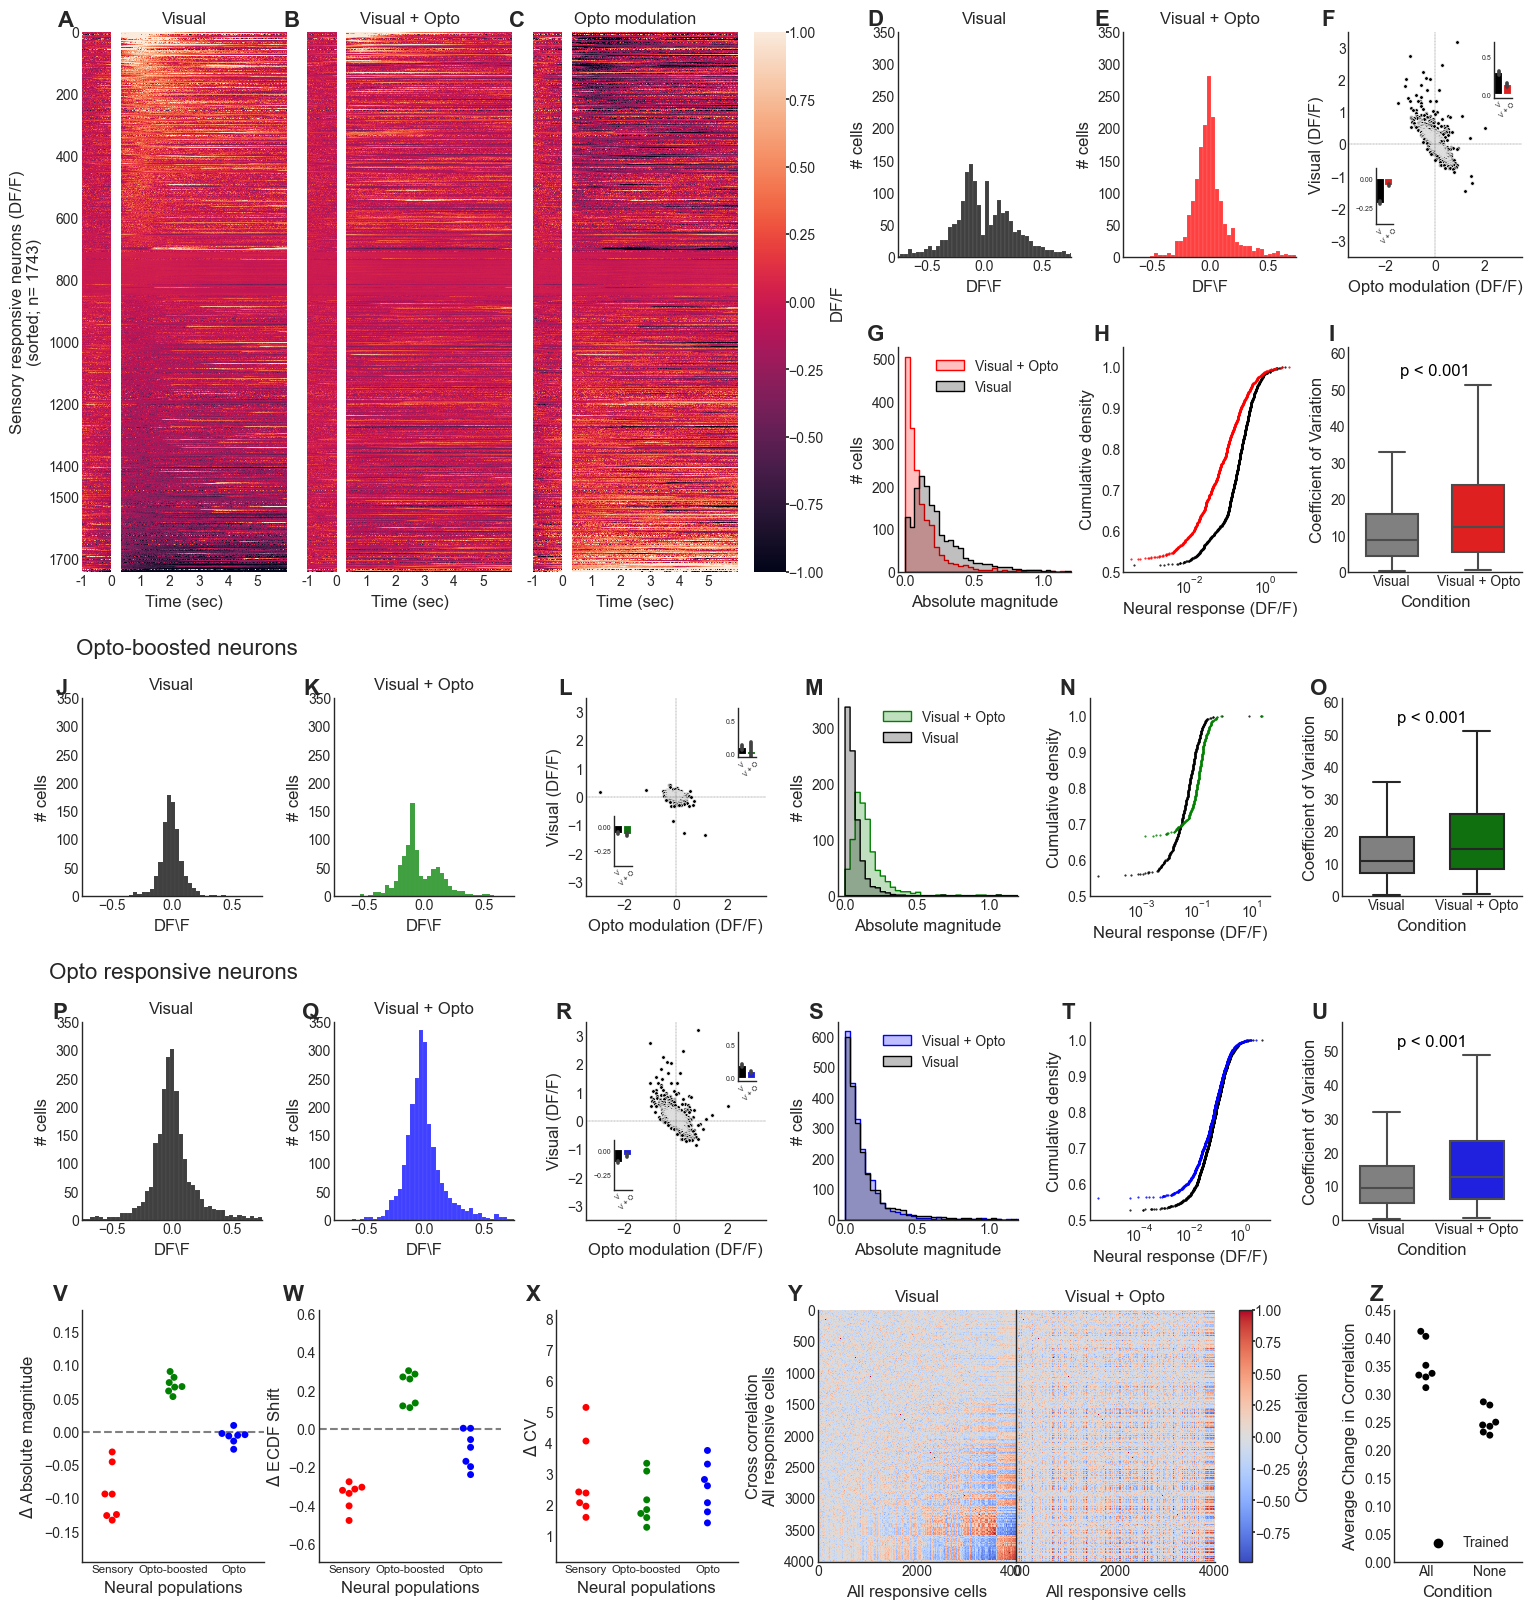

In [3]:
# Figure Supplementary : OPN3 mice - Trained population analysis

interestedCohort = 'Chrimson'
interestedTrainedLevel = 'Trained'

pfun.set_figure()
fig = plt.figure(constrained_layout=False, figsize=(16, 18)) # 8,11 for full A4 page

# set gridspec

gs_visHeatmap  = fig.add_gridspec(ncols=3, nrows=1, bottom=0.65, top=0.95, left=0.05,right=0.46,
                              wspace=0.1, hspace=0.2)
gs_visHeatmapCax  = fig.add_gridspec(ncols=1, nrows=1, bottom=0.65, top=0.95, left=0.48, right=0.50,
                              wspace=0.2, hspace=0.4)
gs_visuaPlots  = fig.add_gridspec(ncols=3, nrows=2, bottom=0.65, top=0.95, left=0.56, right=0.95,
                              wspace=0.3, hspace=0.4)
gs_bothPlots   = fig.add_gridspec(ncols=6, nrows=1, bottom=0.47, top=0.58, left=0.05, right=0.95,
                              wspace=0.4, hspace=0.2)
gs_optoPlots   = fig.add_gridspec(ncols=6, nrows=1, bottom=0.29, top=0.40, left=0.05, right=0.95,
                              wspace=0.4, hspace=0.2)
gs_Summary     = fig.add_gridspec(ncols=3, nrows=1, bottom=0.10, top=0.24, left=0.05, right=0.46, 
                              wspace=0.3, hspace=0.1)
gs_correlation = fig.add_gridspec(ncols=2, nrows=1, bottom=0.10, top=0.24, left=0.51, right=0.82, 
                              wspace=0, hspace=0.1)
gs_correlationMean = fig.add_gridspec(ncols=1, nrows=1, bottom=0.10, top=0.24, left=0.87, right=0.95, 
                              wspace=0.4, hspace=0.1)


# Panel A: Heatmap for Visual responsive cells
ax_gs_visHeatmap = {xx: fig.add_subplot(gs_visHeatmap[xx]) for xx in range(3)}
cax =  {xx: fig.add_subplot(gs_visHeatmapCax[xx]) for xx in range(1)} 
colorbarlimitsForHeatMap = [-1,1] 
pfun.heatmap_comparison('Visual', 'Visual + Opto', sortType = 'Visual', cohort=interestedCohort, 
                       trainedLevel= interestedTrainedLevel, condition='Sensory',
                       colormapSelection = 'OptoProject', axis=ax_gs_visHeatmap, cbar_ax=cax[0], 
                       savefigname=None, savefigpath=None, colorbarlimits=colorbarlimitsForHeatMap)

# Panel B-G: Visual responsive cells analysis
plotParams = {
    'ylimitsforhist': [0, 350],
    'xlimitsforhist': [-0.75, 0.75],
    'analysis_time': 1500,  # in ms
    'colorbarlimitsForHeatMap': [-1, 1],
    'scatterplotlimits': [-3.5, 3.5],
    'ylimitsforECDF': [0.5, 1.05],
    'xlimitsforABS': [-0.05, 1.2],
    'ylimitsforCV': [0.1, 0.15],
    'faceColors': ['black','red'],
     }

total_num_axis = gs_visuaPlots.get_geometry()[0]* gs_visuaPlots.get_geometry()[1]
ax_gs_visuaPlots = {xx: fig.add_subplot(gs_visuaPlots[xx]) for xx in range(total_num_axis)}
pfun.population_plots('Visual', 'Visual + Opto', sortType = 'Visual', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, condition='Sensory', plotParams = plotParams,
                       axisAll=ax_gs_visuaPlots, savefigname=None, savefigpath=None)

# Panel H-M: OptoBoosted responsive cells analysis
total_num_axis = gs_bothPlots.get_geometry()[0]* gs_bothPlots.get_geometry()[1]
ax_gs_bothPlots = {xx: fig.add_subplot(gs_bothPlots[xx]) for xx in range(total_num_axis)}
plotParams['faceColors'] = ['black', 'green']
pfun.population_plots('Visual', 'Visual + Opto', sortType = 'Visual', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, condition='Opto-boosted', plotParams = plotParams,
                       axisAll=ax_gs_bothPlots, savefigname=None, savefigpath=None)

# Panel N-S: Opto responsive cells analysis
total_num_axis = gs_optoPlots.get_geometry()[0]* gs_optoPlots.get_geometry()[1]
ax_gs_optoPlots = {xx: fig.add_subplot(gs_optoPlots[xx]) for xx in range(total_num_axis)}
plotParams['faceColors'] = ['black', 'blue']
pfun.population_plots('Visual', 'Visual + Opto', sortType = 'Visual', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, condition='Opto', plotParams = plotParams,
                       axisAll=ax_gs_optoPlots, savefigname=None, savefigpath=None)

# Panel T: SNR/CV summary results
total_num_axis = gs_Summary.get_geometry()[0]* gs_Summary.get_geometry()[1]
ax_gs_Summary = {xx: fig.add_subplot(gs_Summary[xx]) for xx in range(total_num_axis)}
pfun.plot_paramsDiffPerAnimal('ABS', [interestedCohort], [interestedTrainedLevel], ax= ax_gs_Summary[0], savefigname=None, savefigpath=None)
pfun.plot_paramsDiffPerAnimal('ECDF Shift',  [interestedCohort], [interestedTrainedLevel], ax = ax_gs_Summary[1], savefigname=None, savefigpath=None)
pfun.plot_paramsDiffPerAnimal('CV',  [interestedCohort], [interestedTrainedLevel], ax = ax_gs_Summary[2], savefigname=None, savefigpath=None)


# Panel T: Correlation matrix
total_num_axis = gs_correlation.get_geometry()[0]* gs_correlation.get_geometry()[1]
ax_gs_correlation = {xx: fig.add_subplot(gs_correlation[xx]) for xx in range(total_num_axis)}
pfun.plot_correlationMatrix('Visual', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, responsiveness='All',
                       axs=[ax_gs_correlation[0],ax_gs_correlation[1]] ,savefigname=None, savefigpath=None)

total_num_axis = gs_correlationMean.get_geometry()[0]* gs_correlationMean.get_geometry()[1]
ax_gs_correlationMean = {xx: fig.add_subplot(gs_correlationMean[xx]) for xx in range(total_num_axis)}
pfun.plot_correlationMatrix_meanChange( ['Trained'], cohort=interestedCohort, 
                    responsiveness=['All', 'None'], params = 'All',
                       axs=ax_gs_correlationMean[0], savefigname=None, savefigpath=None)

# Lets add the labels
axes = [ax_gs_visHeatmap, ax_gs_visuaPlots, ax_gs_bothPlots, ax_gs_optoPlots,ax_gs_Summary,ax_gs_correlation,ax_gs_correlationMean]
labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P',
          'Q','R','S','T','U','V','W','X','Y','','Z']
lInd = 0
for ax, label in zip(axes, labels):
    for key in ax:
        if lInd<3:
            ax[key].text(-0.04, 1.04, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        elif lInd>2:
            ax[key].text(-0.08, 1.1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        else:
            ax[key].text(-0.04, 1.04, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1

# Add some text in the figure        
axes[2][0].text(1.2, 1.3, 'Opto-boosted neurons', transform=axes[2][0].transAxes, fontsize=16, 
                        fontweight='normal', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))

axes[3][0].text(1.2, 1.3, 'Opto responsive neurons', transform=axes[3][0].transAxes, fontsize=16, 
                        fontweight='normal', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))

        
plt.tight_layout()
savefigname = 'Figure3Supp1_Chrimson_TrainedPopulationAnalysis'
pfun.save_figure(savefigname,savefigpath)
#plt.close()


